# SVM

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import sys; sys.path.append('../')
from DataPreparing.data_preparing import *
from DataPreparing.HandleClassImbalance import *
from Evaluation.evaluate import *
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE,SMOTENC,SMOTEN,BorderlineSMOTE
from imblearn.under_sampling import NearMiss,RandomUnderSampler
from sklearn.model_selection import train_test_split

# Read Data

In [3]:
X_train, X_val, y_train, y_val =read_data("../DataFiles/gcn_embeddings/all/embeddings_group3.csv", drop_1st_col=True)

In [4]:
print(set(y_train))

{'CWE23', 'CWE690', 'CWE124', 'CWE401', 'CWE194'}


{'CWE124': 2213, 'CWE194': 1281, 'CWE23': 2683, 'CWE401': 1794, 'CWE690': 1053}


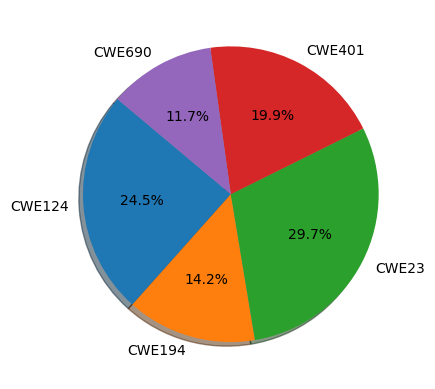

In [5]:
show_proportions(y_train)
unique, counts = np.unique(y_train, return_counts=True)
plt.pie(counts, labels=unique, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

# Initial Fit

## SVM


In [6]:
%%time
clf = svm.SVC( kernel='rbf')
clf.fit(X_train, y_train)
evaluate(clf, X_val,y_val , clf.predict(X_train), y_train)

Training Accurracy: 99.81161347517731%
              precision    recall  f1-score   support

      CWE124       1.00      1.00      1.00       575
      CWE194       0.99      1.00      1.00       311
       CWE23       1.00      1.00      1.00       630
      CWE401       1.00      1.00      1.00       467
      CWE690       1.00      1.00      1.00       273

    accuracy                           1.00      2256
   macro avg       1.00      1.00      1.00      2256
weighted avg       1.00      1.00      1.00      2256

CPU times: total: 5.52 s
Wall time: 7.76 s


## LR

In [7]:
clf=LogisticRegression(random_state=0 , solver='lbfgs', multi_class='multinomial')
clf.fit(X_train, y_train)
evaluate(clf, X_val,y_val, clf.predict(X_train), y_train)

C:\Users\dell\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accurracy: 99.96675531914893%
              precision    recall  f1-score   support

      CWE124       1.00      1.00      1.00       575
      CWE194       1.00      1.00      1.00       311
       CWE23       1.00      1.00      1.00       630
      CWE401       1.00      1.00      1.00       467
      CWE690       1.00      1.00      1.00       273

    accuracy                           1.00      2256
   macro avg       1.00      1.00      1.00      2256
weighted avg       1.00      1.00      1.00      2256



In [8]:
#save model
save_model(clf, "LR_model_group3")

## Test Safe Files

In [18]:
# loop on csv files in the folder
import os
import pandas as pd
import numpy as np

path = "../DataFiles/gcn_embeddings/group3/safe_concat/"
all_probabilities,x_safe_test,y_safe_test= get_class_probs(path,clf)

['concatEmbeddings_124.csv', 'concatEmbeddings_194.csv', 'concatEmbeddings_23.csv', 'concatEmbeddings_401.csv', 'concatEmbeddings_690.csv']


In [19]:
print(len(all_probabilities))
print(clf.classes_)

5
['CWE124' 'CWE194' 'CWE23' 'CWE401' 'CWE690']


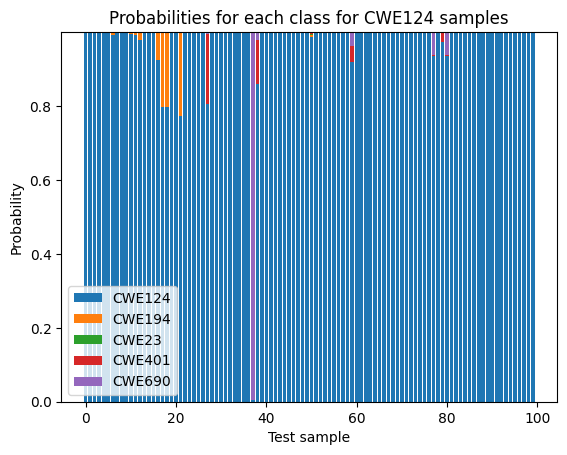

In [20]:
show_probs(all_probabilities[0], clf,"CWE124")


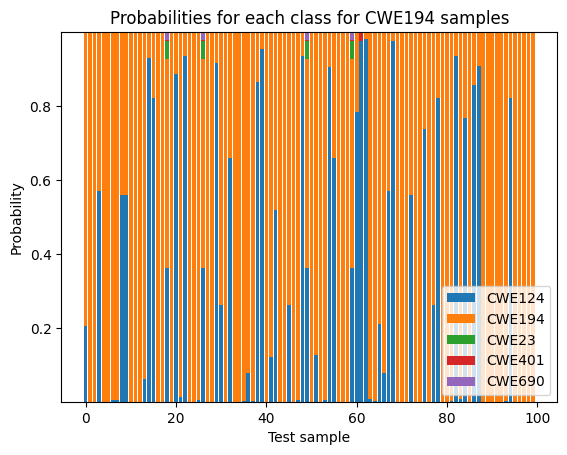

In [21]:
show_probs(all_probabilities[1], clf,"CWE194")

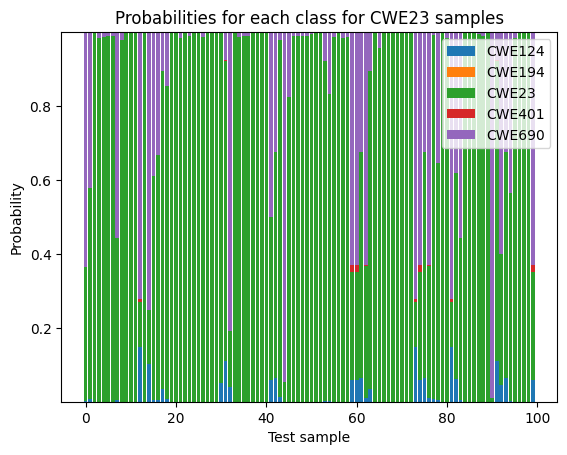

In [22]:
show_probs(all_probabilities[2], clf,"CWE23")

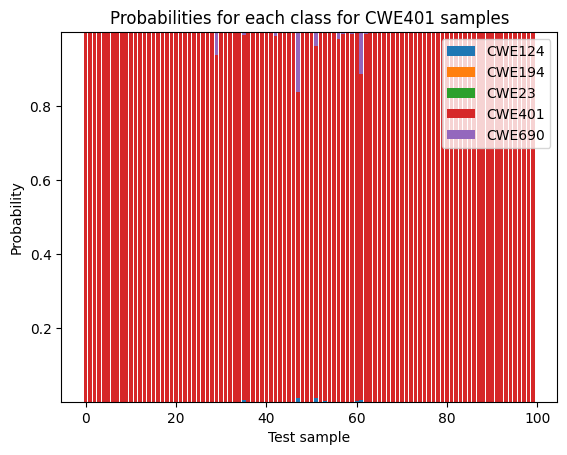

In [23]:
show_probs(all_probabilities[3], clf,"CWE401")

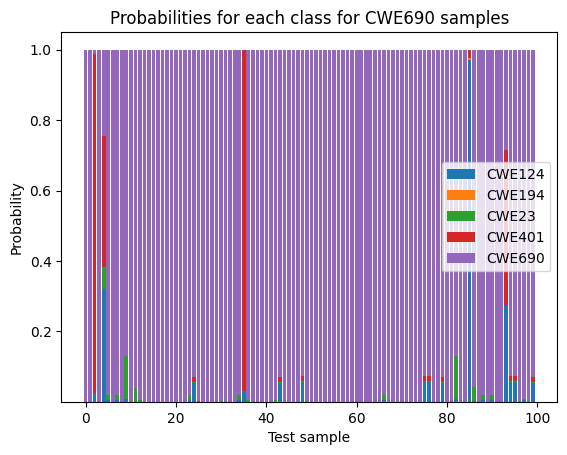

In [25]:
show_probs(all_probabilities[4], clf,"CWE690")